# House Prices - Advanced Regression Techniques

Тропынина Элина

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

Открываем файлики

In [19]:
test = pd.read_csv('C:\\Users\\eatropynina\\Magnit\\test.csv', sep = ',', encoding='utf-8')
train = pd.read_csv('C:\\Users\\eatropynina\\Magnit\\train.csv', sep = ',', encoding='utf-8')
sample_submission = pd.read_csv('C:\\Users\\eatropynina\\Magnit\\sample_submission.csv', sep = ',', encoding='utf-8')

Смотрим, что у нас за данные

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Строим тепловую карту, чтобы найти пропуски

<Axes: >

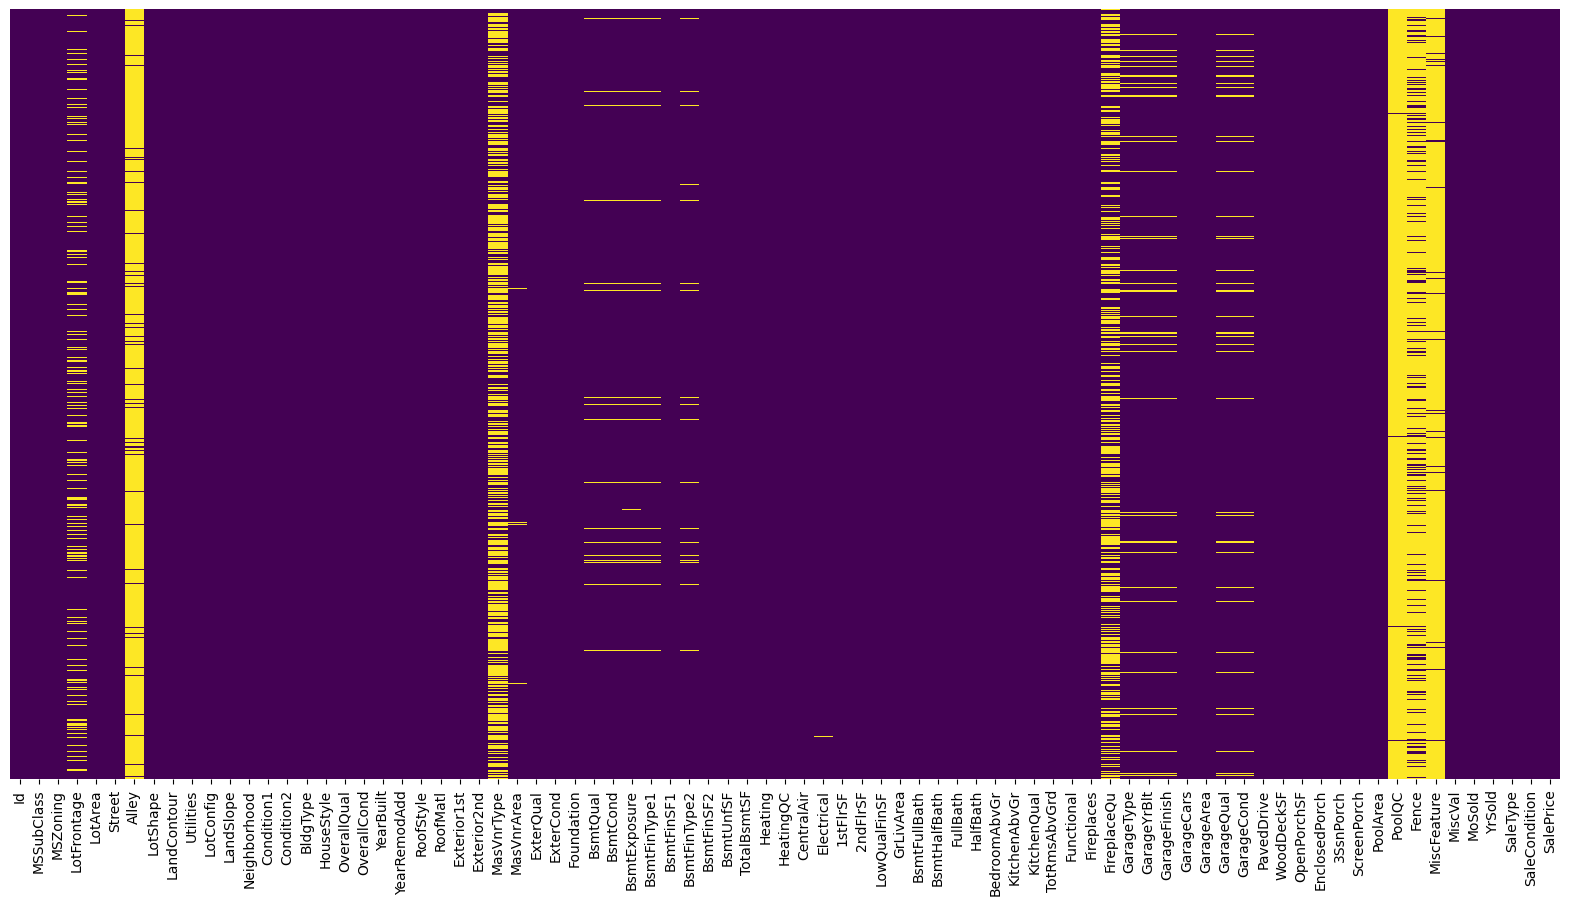

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Смотрим в каких признаках больше всего пропусков в данных

In [22]:
train.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
dtype: int64

Удалим признаки с 1 по 12, в которых мало данных и много пропусков 

In [23]:
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu', 'LotFrontage', 
                            'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageType', 'GarageQual', 'BsmtFinType2'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu', 'LotFrontage', 
                            'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageType', 'GarageQual', 'BsmtFinType2'])

Смотрим оставшиеся пропуски в данных

In [24]:
train.isnull().sum().sort_values(ascending=False).head(7)

BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrArea       8
Electrical       1
GrLivArea        0
dtype: int64

Смотрим какие у нас данные в признаках с пропусками

In [25]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [26]:
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(), inplace=True)

In [27]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [28]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [29]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [30]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [31]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

Так как признаки категориальные, лучше удалить строки с пропусками

In [32]:
train.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1421 non-null   int64  
 1   MSSubClass     1421 non-null   int64  
 2   MSZoning       1421 non-null   object 
 3   LotArea        1421 non-null   int64  
 4   Street         1421 non-null   object 
 5   LotShape       1421 non-null   object 
 6   LandContour    1421 non-null   object 
 7   Utilities      1421 non-null   object 
 8   LotConfig      1421 non-null   object 
 9   LandSlope      1421 non-null   object 
 10  Neighborhood   1421 non-null   object 
 11  Condition1     1421 non-null   object 
 12  Condition2     1421 non-null   object 
 13  BldgType       1421 non-null   object 
 14  HouseStyle     1421 non-null   object 
 15  OverallQual    1421 non-null   int64  
 16  OverallCond    1421 non-null   int64  
 17  YearBuilt      1421 non-null   int64  
 18  YearRemodAdd 

<Axes: >

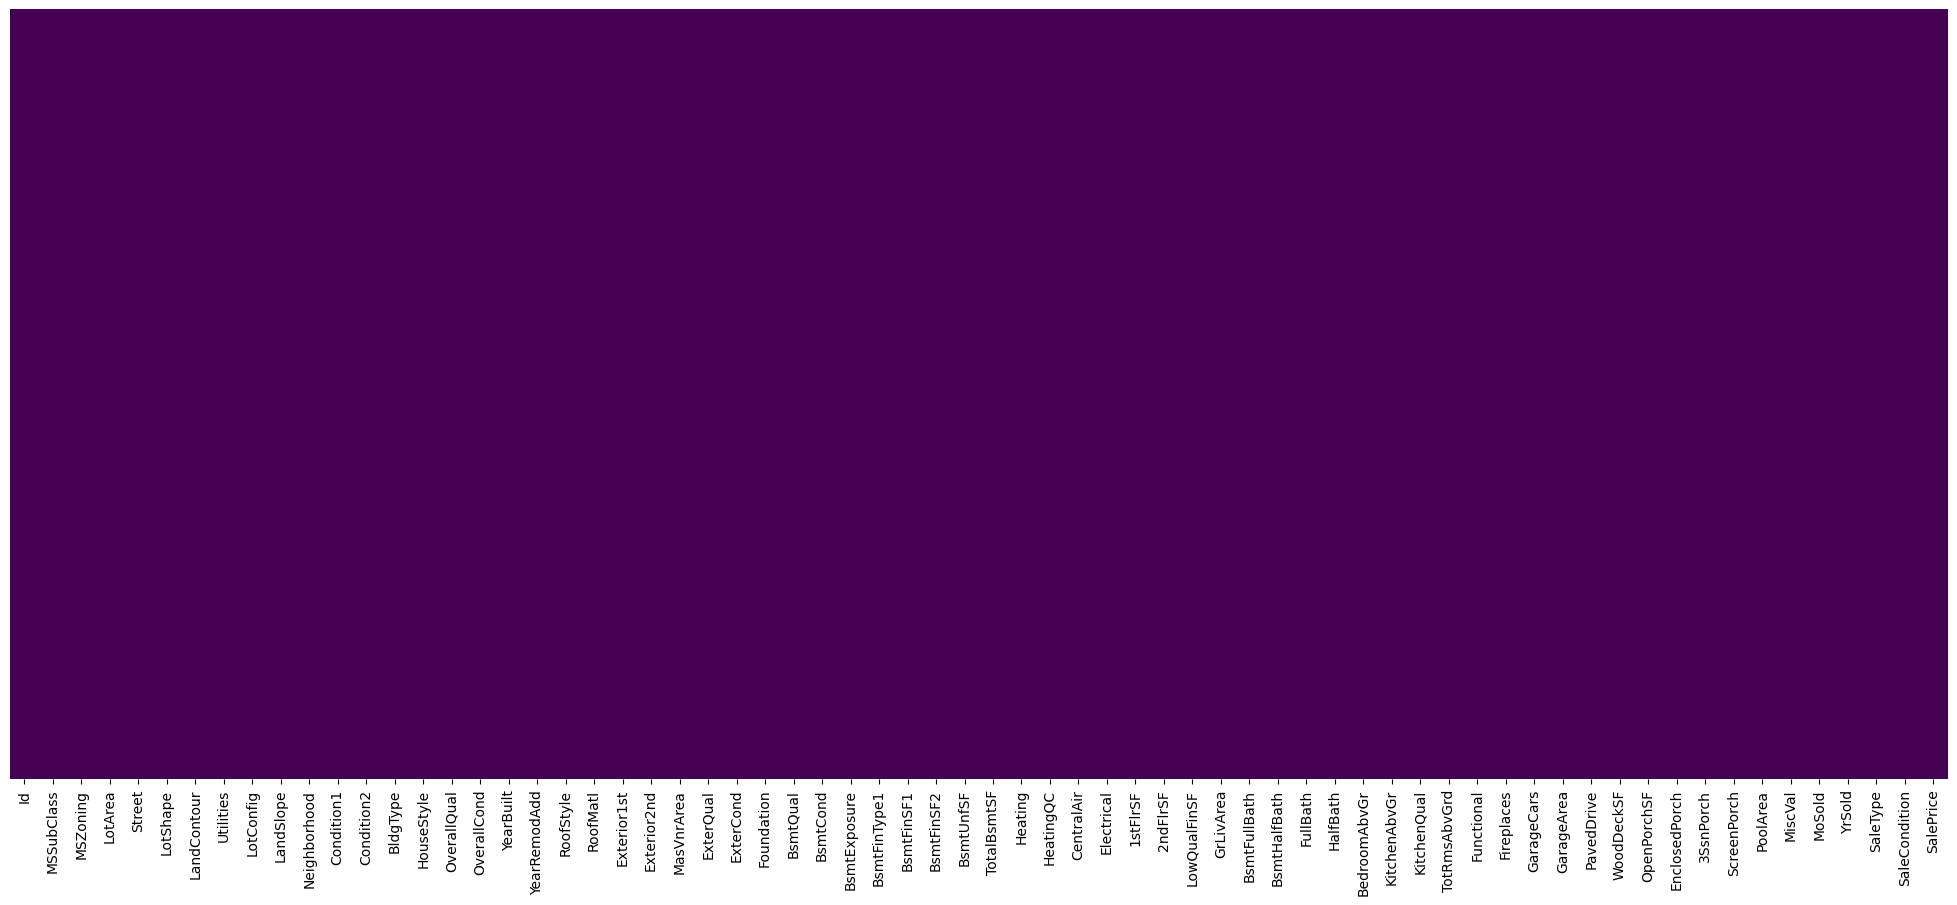

In [34]:
plt.figure(figsize=(25,10))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

У нас больше нет пропущенных значений! Ура!

# Смотрим выбросы на всех числовых признаках

Смотрим какие есть числовые признаки, чтобы дальше их посмотреть детальнее и поискать в них выбросы

In [35]:
train.dtypes[train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Посмотрим выбросы у каждого признака, который хотя бы мало мальски их имеет. Определяю выбросы с помощью логики, божьей силы и туторов на ютубе

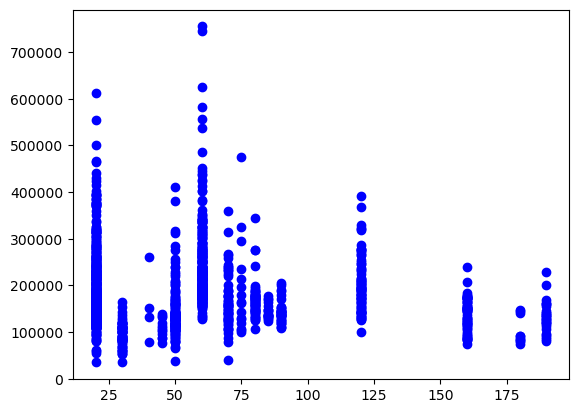

In [36]:
#MSSubClass - класс здания
plt.scatter(x='MSSubClass',y='SalePrice',data = train, color = 'blue')

Тут видимых выбросов нет

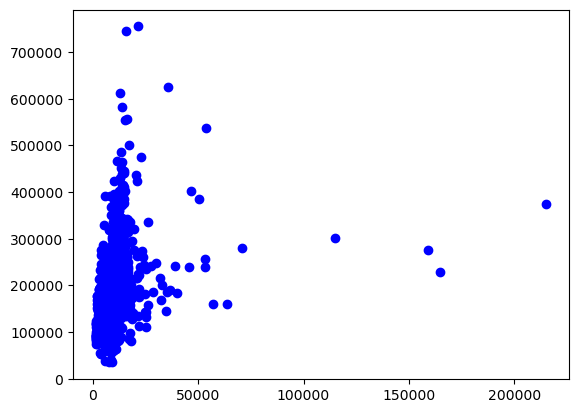

In [37]:
#LotArea - площадь самого участка
plt.scatter(x='LotArea',y='SalePrice',data = train, color = 'blue')

Тут уже есть выбросы, посмотрим какие конкретно строки

In [38]:
#Удалим строки - 249,313,335,706
train.query('LotArea>100000')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,500,6,2007,WD,Normal,277000
313,314,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,...,0,0,0,0,700,8,2008,WD,Normal,228950
706,707,20,RL,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,0,6,2007,WD,Normal,302000


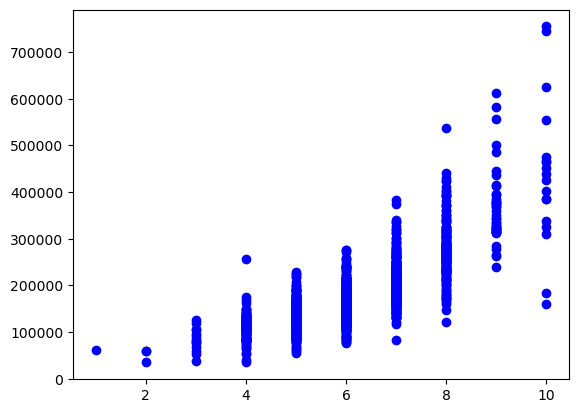

In [39]:
#OverallQual - качество материалов и отделки
plt.scatter(x='OverallQual',y='SalePrice',data = train, color = 'blue')

In [40]:
train.query('OverallQual==10').sort_values(by='SalePrice').head(5)
#Еще уберем 1298, 523

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1442,1443,60,FV,11003,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,310000
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,325000
994,995,20,RL,12456,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,337500


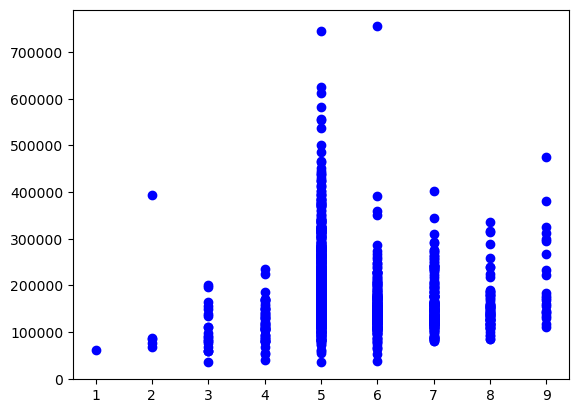

In [41]:
#OverallCond - общая оценка
plt.scatter(x='OverallCond',y='SalePrice',data = train, color = 'blue')

In [42]:
train.query('OverallCond == 2').sort_values(by='SalePrice')
#Уберем 378

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
398,399,30,RM,8967,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2007,WD,Abnorml,67000
250,251,30,RL,5350,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,450,5,2010,WD,Normal,76500
88,89,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
676,677,70,RM,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,90,0,0,0,0,5,2006,WD,Normal,87000
378,379,20,RL,11394,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,New,Partial,394432


In [44]:
train.query('OverallCond == 5').sort_values(by='SalePrice',ascending = False).head(5)
#Еще уберем 1182

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
803,804,60,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,192,0,0,1,2009,New,Partial,582933
1046,1047,60,RL,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,556581


In [46]:
train.query('OverallCond == 6').sort_values(by='SalePrice',ascending = False).head(5)
#Еще уберем 691

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
688,689,20,RL,8089,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,392000
608,609,70,RL,12168,Pave,Reg,HLS,AllPub,Inside,Mod,...,0,0,0,0,0,9,2007,WD,Alloca,359100
654,655,20,RL,10437,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2008,WD,Normal,350000
1024,1025,20,RL,15498,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,174,0,0,0,0,5,2008,COD,Abnorml,287000


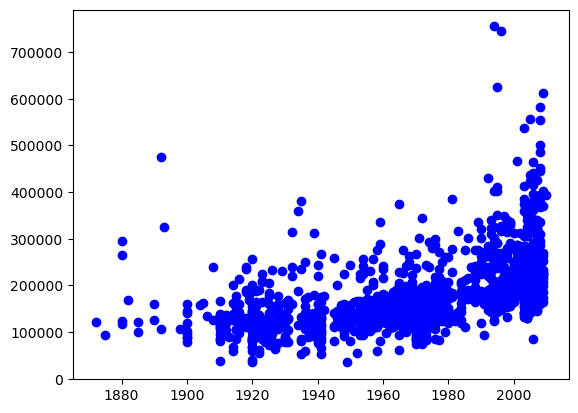

In [47]:
#YearBuilt - год постройки
plt.scatter(x='YearBuilt',y='SalePrice',data = train, color = 'blue')

In [48]:
train.query('YearBuilt > 1890 & YearBuilt < 1900').sort_values(by='SalePrice',ascending = False)
#Еще уберем 185

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,325000
1292,1293,70,RM,6600,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2009,WD,Normal,107500
809,810,75,RM,8100,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2009,WD,Normal,106000


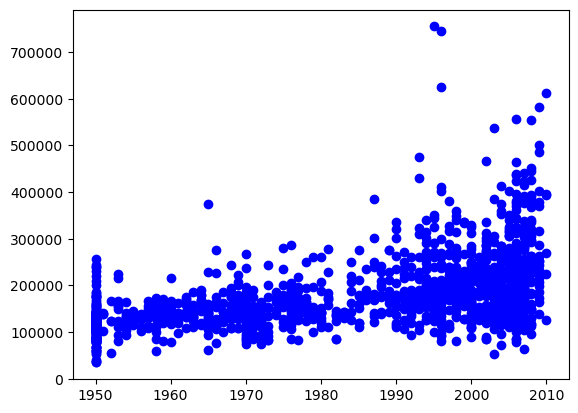

In [49]:
#YearRemodAdd - год, когда был сделан ремонт
plt.scatter(x='YearRemodAdd',y='SalePrice',data = train, color = 'blue')

In [50]:
train.query('YearRemodAdd > 1960 & YearRemodAdd < 1970').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 313

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000
1423,1424,80,RL,19690,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,738,0,8,2006,WD,Alloca,274970
1250,1251,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000


In [51]:
train.query('YearRemodAdd > 1990 & YearRemodAdd < 2000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 691,1182,1169

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000


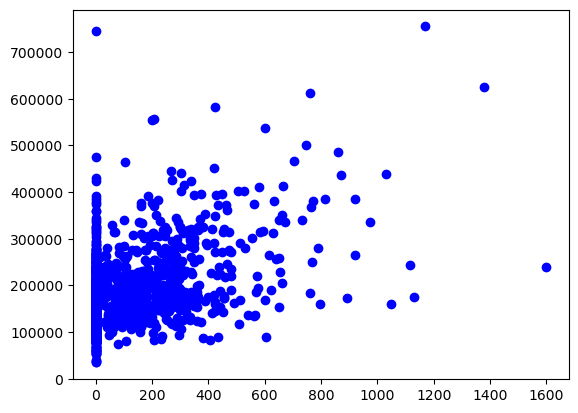

In [52]:
#MasVnrArea - Тип облицовки
plt.scatter(x='MasVnrArea',y='SalePrice',data = train, color = 'blue')

In [53]:
train.query('MasVnrArea > 1500').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 297

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,7399,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,198,0,0,6,2007,WD,Normal,239000


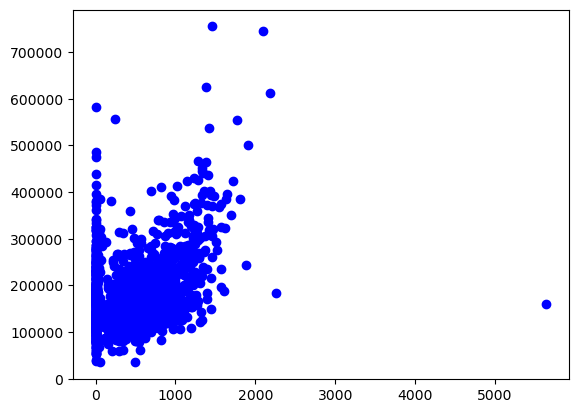

In [54]:
#BsmtFinSF1 - Квадратные футы с отделкой 1-го типа
plt.scatter(x='BsmtFinSF1',y='SalePrice',data = train, color = 'blue')

In [55]:
train.query('BsmtFinSF1 > 5000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 1298

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


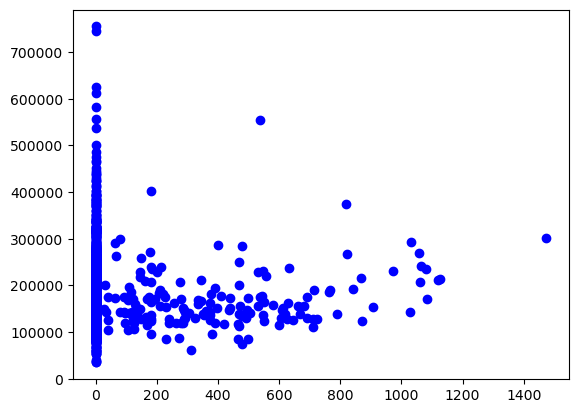

In [56]:
##BsmtFinSF2 - Квадратные футы с отделкой 2-го типа
plt.scatter(x='BsmtFinSF2',y='SalePrice',data = train, color = 'blue')

In [57]:
train.query('BsmtFinSF2 > 1400').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 322

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,10380,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,301000


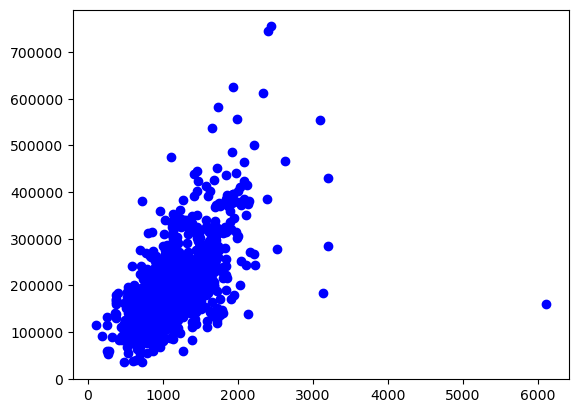

In [58]:
#TotalBsmtSF - Общая площадь фундамента
plt.scatter(x='TotalBsmtSF',y='SalePrice',data = train, color = 'blue')

In [59]:
train.query('TotalBsmtSF > 5000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 1298

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [60]:
train.query('TotalBsmtSF > 2000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 1182,691

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657


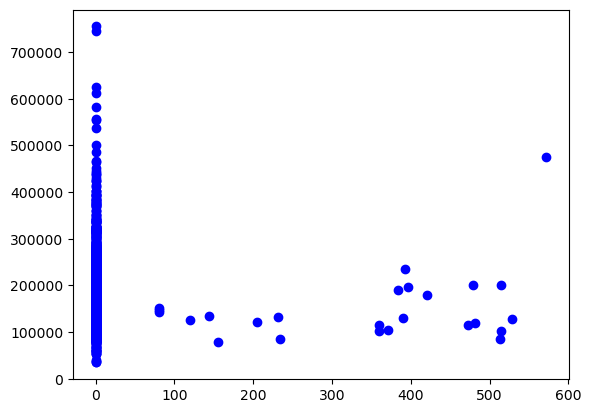

In [61]:
#LowQualFinSF - Низкое качество готовой отделки
plt.scatter(x='LowQualFinSF',y='SalePrice',data = train, color = 'blue')

In [62]:
train.query('LowQualFinSF > 500').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 185

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000
170,171,50,RM,12358,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,128500


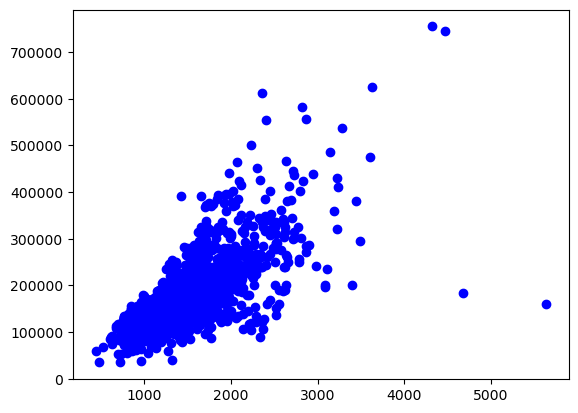

In [63]:
#GrLivArea - площадь жилой зоны
plt.scatter(x='GrLivArea',y='SalePrice',data = train, color = 'blue')

In [64]:
train.query('GrLivArea > 4000').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 691, 1182, 523, 1298

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


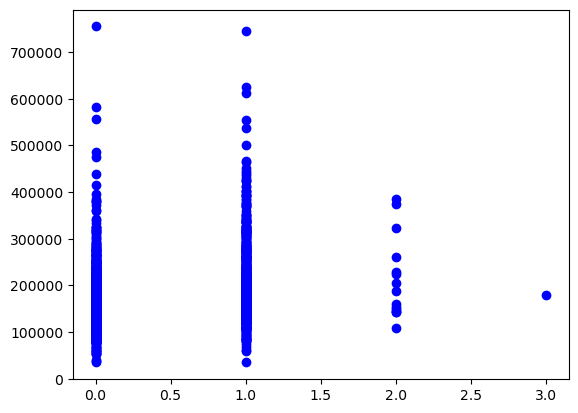

In [65]:
#BsmtFullBath - Ванные комнаты выше уровня земли (кол-во)
plt.scatter(x='BsmtFullBath',y='SalePrice',data = train, color = 'blue')

In [66]:
train.query('BsmtFullBath == 3').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 738

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,179000


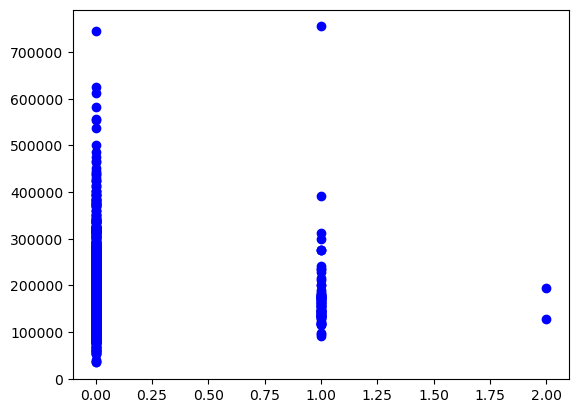

In [67]:
#BsmtHalfBath - полу-ванные комнаты
plt.scatter(x='BsmtHalfBath',y='SalePrice',data = train, color = 'blue')

In [68]:
train.query('BsmtHalfBath == 2').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 597, 954

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,3922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,New,Partial,194201
954,955,90,RL,9400,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,10,2006,WD,AdjLand,127500


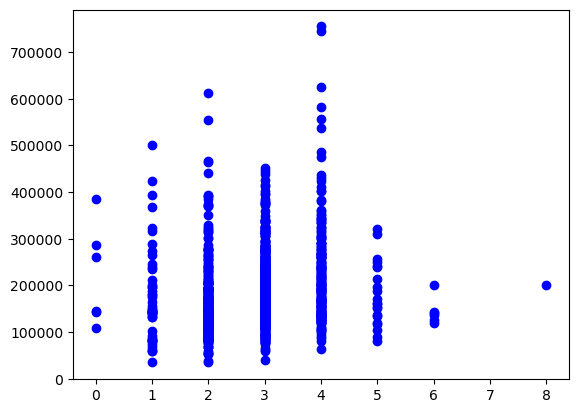

In [69]:
#BedroomAbvGr - кол-во спален
plt.scatter(x='BedroomAbvGr',y='SalePrice',data = train, color = 'blue')

In [70]:
train.query('BedroomAbvGr == 8').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 635

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000


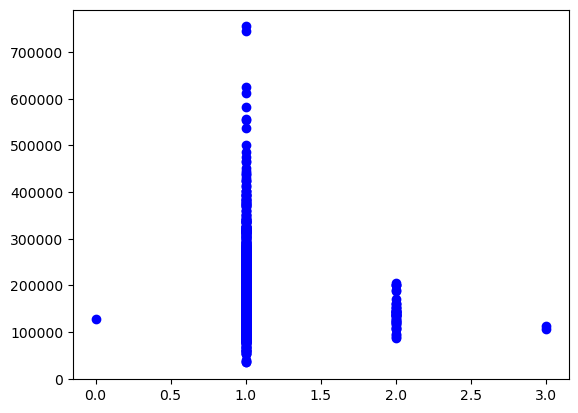

In [71]:
#KitchenAbvGr - кол-во кухонь
plt.scatter(x='KitchenAbvGr',y='SalePrice',data = train, color = 'blue')

In [72]:
train.query('KitchenAbvGr == 3').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 48,809

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,6,2009,New,Partial,113000
809,810,75,RM,8100,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2009,WD,Normal,106000


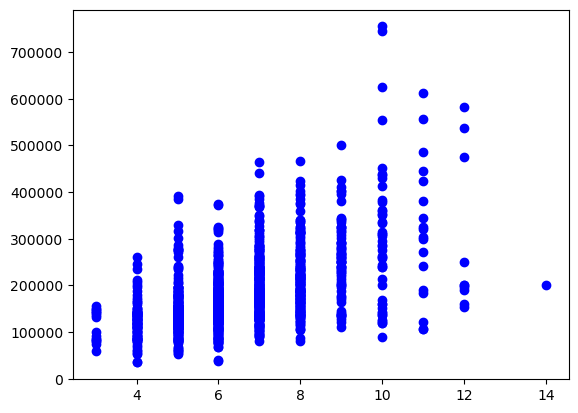

In [73]:
#TotRmsAbvGrd - общее кол-во комнат (без ванн. комнат)
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data = train, color = 'blue')

In [74]:
train.query('TotRmsAbvGrd == 14').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 635

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000


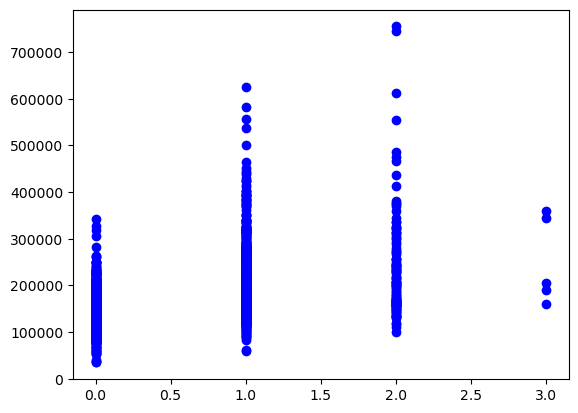

In [75]:
#Fireplaces - кол-во каминов
plt.scatter(x='Fireplaces',y='SalePrice',data = train, color = 'blue')

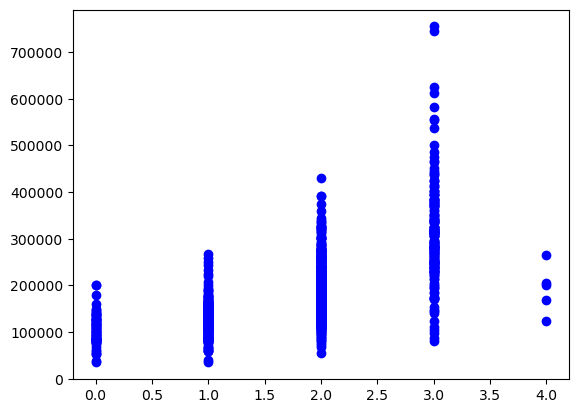

In [76]:
#GarageCars - сколько машин влезает в гараж
plt.scatter(x='GarageCars',y='SalePrice',data = train, color = 'blue')

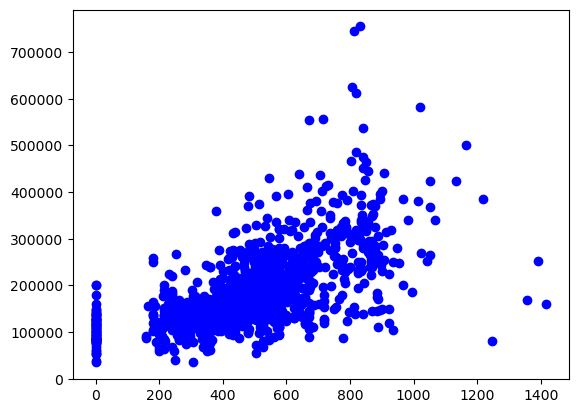

In [77]:
#GarageArea - площадь гаража
plt.scatter(x='GarageArea',y='SalePrice',data = train, color = 'blue')

In [78]:
train.query('GarageArea > 1200').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 825,581,1190,1298,1061

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
825,826,20,RL,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,New,Partial,385000
581,582,20,RL,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,New,Partial,253293
1190,1191,190,RL,32463,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,3,2007,WD,Normal,168000
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
1061,1062,30,C (all),18000,Grvl,Reg,Low,AllPub,Inside,Gtl,...,0,0,0,0,560,8,2008,ConLD,Normal,81000


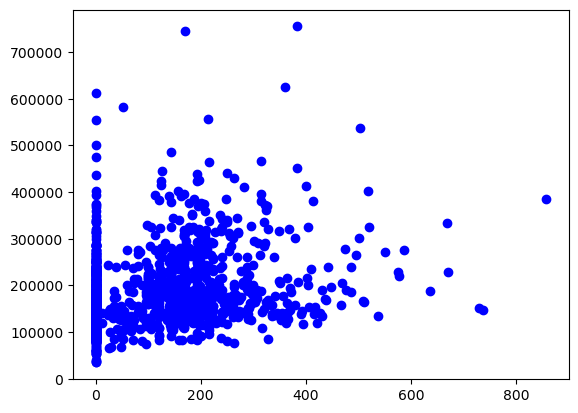

In [79]:
#WoodDeckSF - площадь деревянного настила
plt.scatter(x='WoodDeckSF',y='SalePrice',data = train, color = 'blue')

In [80]:
train.query('WoodDeckSF > 800').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 53

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,50271,Pave,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,385000


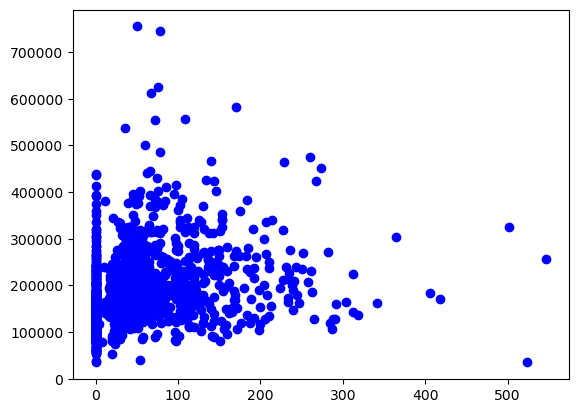

In [81]:
#OpenPorchSF - площадь открытой веранды
plt.scatter(x='OpenPorchSF',y='SalePrice',data = train, color = 'blue')

In [82]:
train.query('OpenPorchSF > 500').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 583,1328,495

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,325000
1328,1329,50,RM,10440,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,480,0,1150,6,2008,WD,Normal,256000
495,496,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,115,0,0,0,0,11,2009,WD,Abnorml,34900


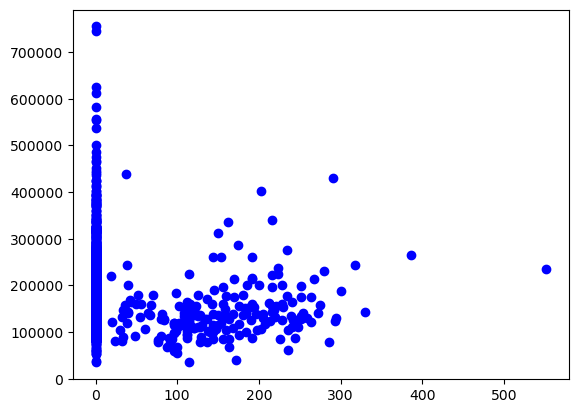

In [83]:
#EnclosedPorch - площадь закрытой веранды
plt.scatter(x='EnclosedPorch',y='SalePrice',data = train, color = 'blue')

In [84]:
train.query('EnclosedPorch > 500').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 197

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,552,0,0,512,0,3,2006,WD,Abnorml,235000


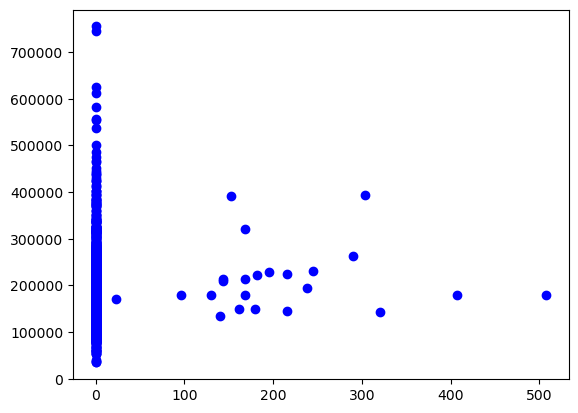

In [85]:
#3SsnPorch - площадь веранды на три сезона
plt.scatter(x='3SsnPorch',y='SalePrice',data = train, color = 'blue')

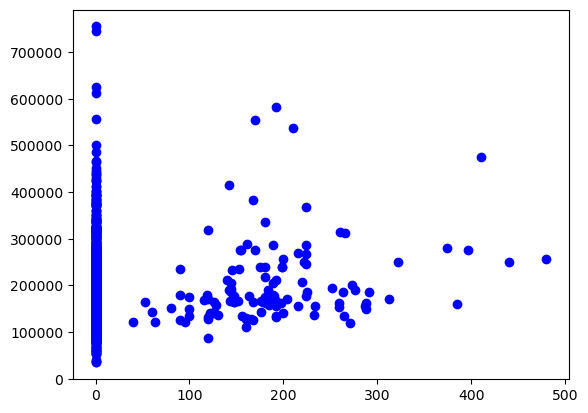

In [86]:
#ScreenPorch - площадь застекленной веранды
plt.scatter(x='ScreenPorch',y='SalePrice',data = train, color = 'blue')

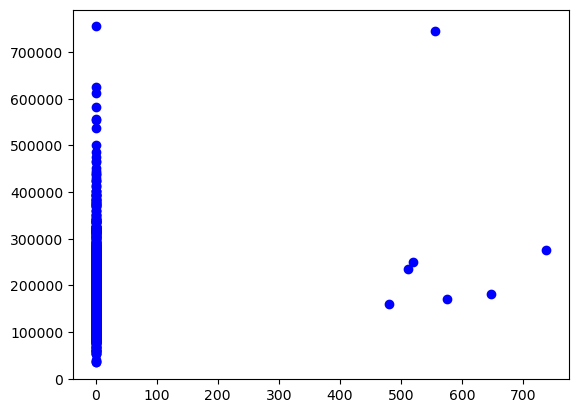

In [87]:
#PoolArea - площадь бассейна
plt.scatter(x='PoolArea',y='SalePrice',data = train, color = 'blue')

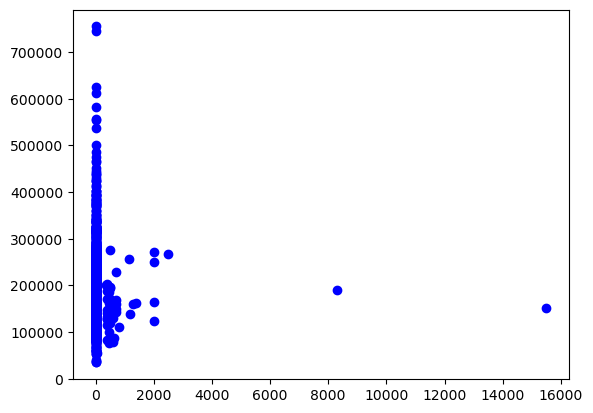

In [88]:
#MiscVal - стоимость прочих дополнений
plt.scatter(x='MiscVal',y='SalePrice',data = train, color = 'blue')

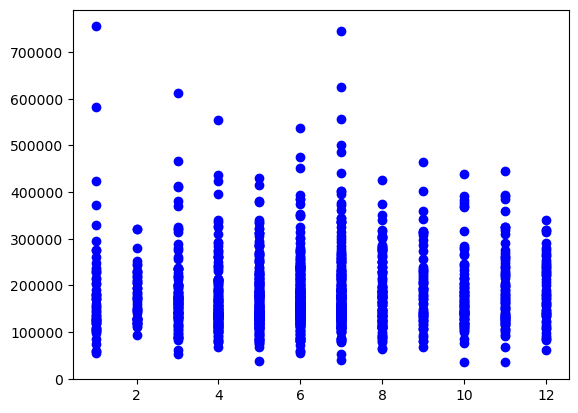

In [89]:
#MoSold - сколько месяцев продавался
plt.scatter(x='MoSold',y='SalePrice',data = train, color = 'blue')

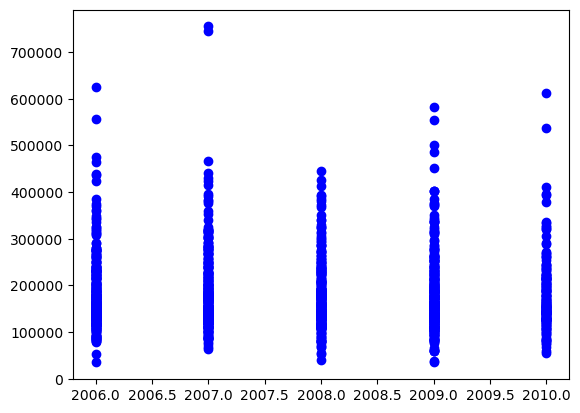

In [90]:
#YrSold - год продажи
plt.scatter(x='YrSold',y='SalePrice',data = train, color = 'blue')

В итоге удаляем следующие номера из датасета, так как они ведут себя как выбросы: 
49, 54, 186, 198, 250, 298, 314, 323, 336, 379, 496, 524, 582, 584, 598, 636, 
692, 707, 739, 810, 826, 935, 955, 1062, 1170, 1183, 1191, 1299, 1329

In [92]:
values=[49,54,186, 198, 250,298,314,323,336,379,496,524,582,584,598,636,692, 707, 739,810,826,935,955,1062,1170,1183,1191, 1299, 1329]

In [93]:
train = train[train.Id.isin(values) == False]

# Feature engineering

Создадим новые признаки путем изменения существующих

In [94]:
#Вычисляем общий возраст дома
train['houseage'] = train['YrSold'] - train['YearBuilt']
test['houseage'] = test['YrSold'] - test['YearBuilt']

In [95]:
#Вычисляем как давно дом обновили
train['houseremodelage'] = train['YrSold'] - train['YearRemodAdd']
test['houseremodelage'] = test['YrSold'] - test['YearRemodAdd']

In [96]:
#Общая площадь дома
train['totalsf'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['totalsf'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']

In [97]:
#Площадь подвальных помещений
train['totalarea'] = train['GrLivArea'] + train['TotalBsmtSF']
test['totalarea'] = test['GrLivArea'] + test['TotalBsmtSF']

In [98]:
#Площадь всех ванных
train['totalbaths'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['BsmtHalfBath'] + train['HalfBath']) 
test['totalbaths'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['BsmtHalfBath'] + test['HalfBath']) 

In [99]:
#Площадь веранд в доме
train['totalporchsf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
test['totalporchsf'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF']

In [103]:
#Удалим колонки, которые использовали выше для обобщения
train = train.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', 
                                  '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 
                                  'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 
                                  'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 
                                  'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test = test.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 
                                'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 
                                'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

KeyError: "['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'] not found in axis"

# One-Hot Encoding

Смотрим на наши категориальные признаки

In [104]:
train.dtypes[train.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [105]:
train.shape

(1392, 55)

In [106]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MoSold,SaleType,SaleCondition,SalePrice,houseage,houseremodelage,totalsf,totalarea,totalbaths,totalporchsf
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,WD,Normal,208500,5,5,2416,2566,3.5,61
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,5,WD,Normal,181500,31,31,2240,2524,2.5,298
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,9,WD,Normal,223500,7,6,2272,2706,3.5,42
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,2,WD,Abnorml,140000,91,36,1933,2473,2.0,307
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,12,WD,Normal,250000,8,8,2853,3343,3.5,276


In [107]:
train = pd.get_dummies(train, columns=['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                                       'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond',
                                       'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating','HeatingQC','CentralAir',
                                      'Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'], drop_first=True)

In [108]:
test = pd.get_dummies(test, columns=['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                                       'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond',
                                       'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating','HeatingQC','CentralAir',
                                      'Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'], drop_first=True)

Проверяем, что у нас больше нет категориальных данных

In [109]:
train.dtypes[train.dtypes=='object']

Series([], dtype: object)

In [110]:
test.dtypes[test.dtypes=='object']

Series([], dtype: object)

Смотрим размер датасета после onehotencoding и ужасаемся

In [111]:
train.shape

(1392, 189)

In [112]:
train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,150,0,3,1,8,...,False,False,False,False,True,False,False,False,True,False
1,20,9600,6,8,0.0,284,0,3,1,6,...,False,False,False,False,True,False,False,False,True,False
2,60,11250,7,5,162.0,434,0,3,1,6,...,False,False,False,False,True,False,False,False,True,False
3,70,9550,7,5,0.0,540,0,3,1,7,...,False,False,False,False,True,False,False,False,False,False
4,60,14260,8,5,350.0,490,0,4,1,9,...,False,False,False,False,True,False,False,False,True,False


<Axes: >

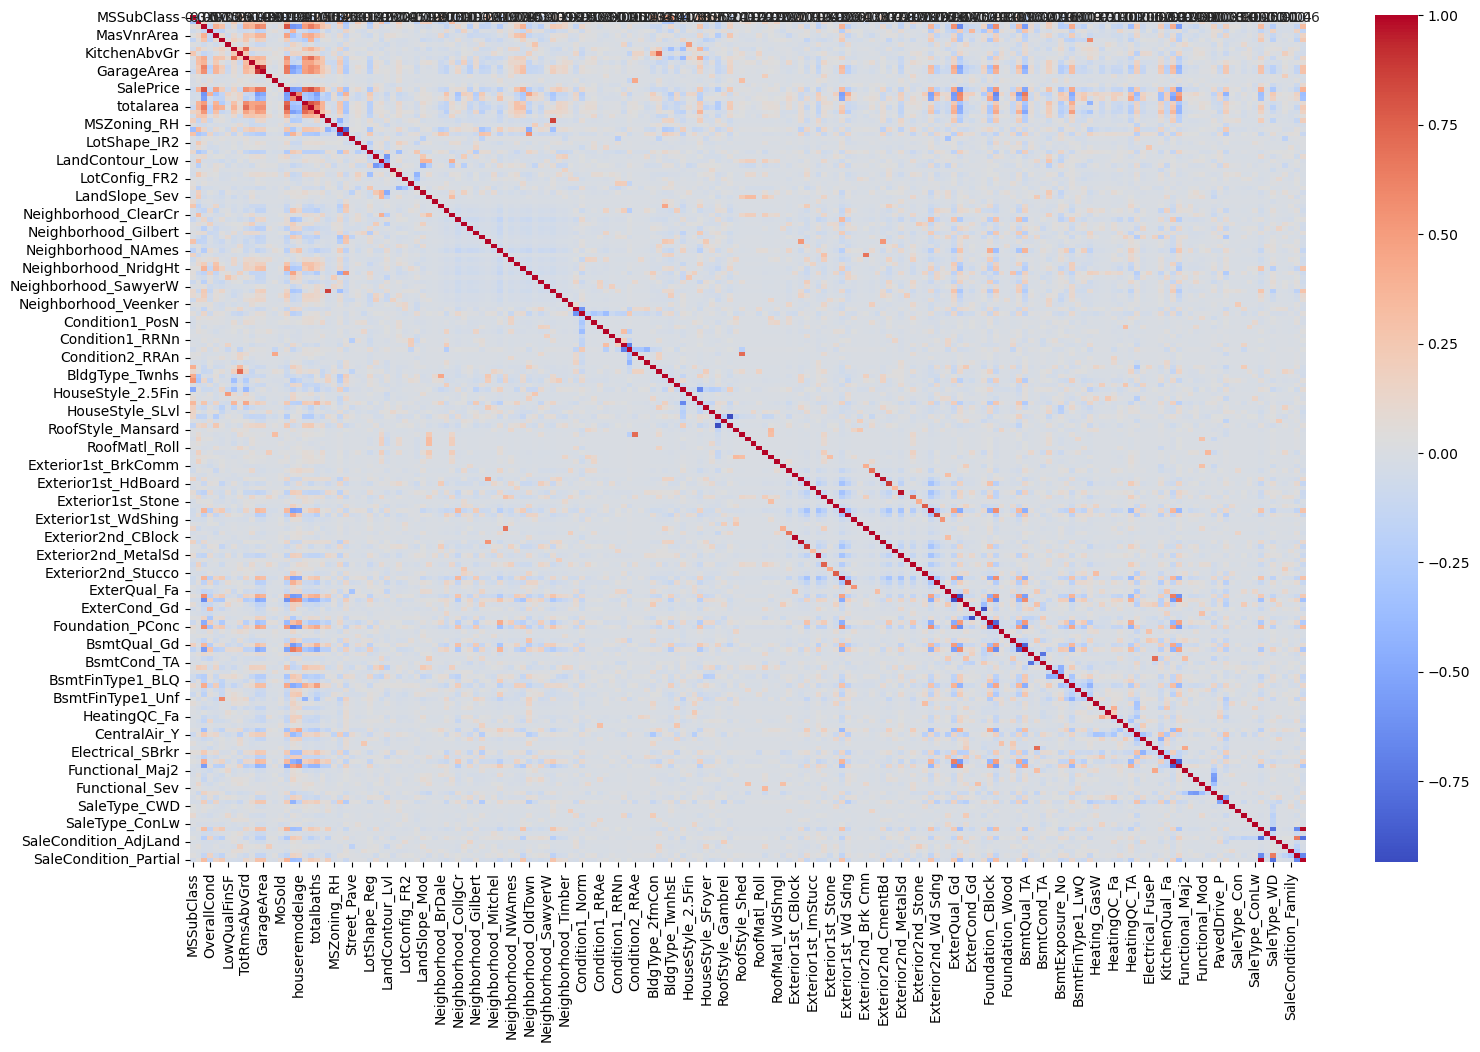

In [114]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(18,11))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

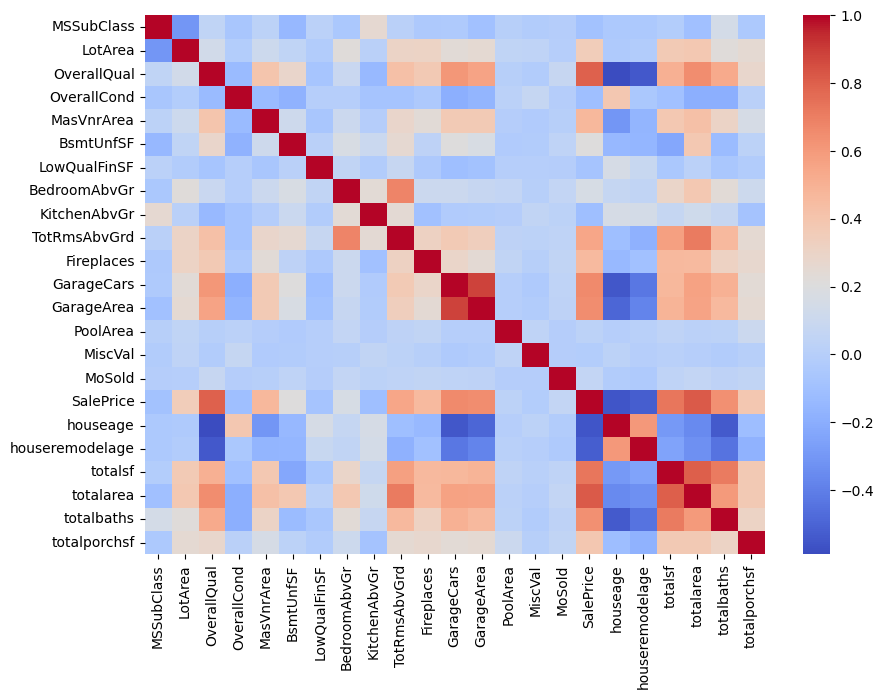

In [127]:
plt.figure(figsize=(10,7))
sns.heatmap(train[numerical_columns].corr(),cmap='coolwarm',annot=False)

Как мы видим, есть элементы, которые очень сильно коррелируют между собой, это - GarageCars и GarageArea. Эти элементы, как правило, дают одинаковую информацию, следовательно, они избыточны для нас, из них двоих мы оставим столбец с максимальной корреляцией с SalePrice - GarageArea

In [129]:
train.drop('GarageCars', axis=1, inplace=True)

<Axes: >

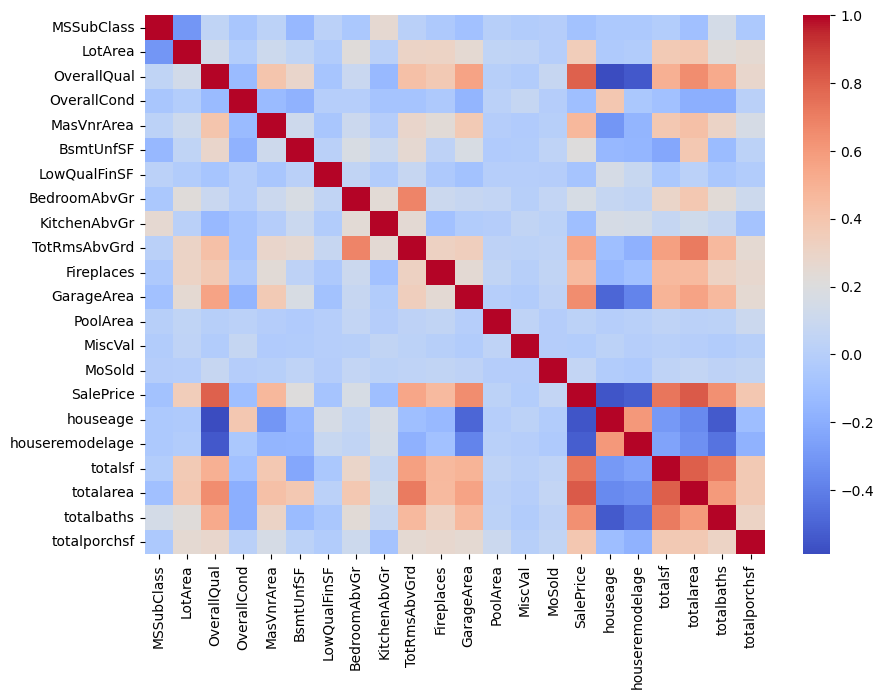

In [133]:
plt.figure(figsize=(10,7))
sns.heatmap(train[numerical_columns].corr(),cmap='coolwarm',annot=False)

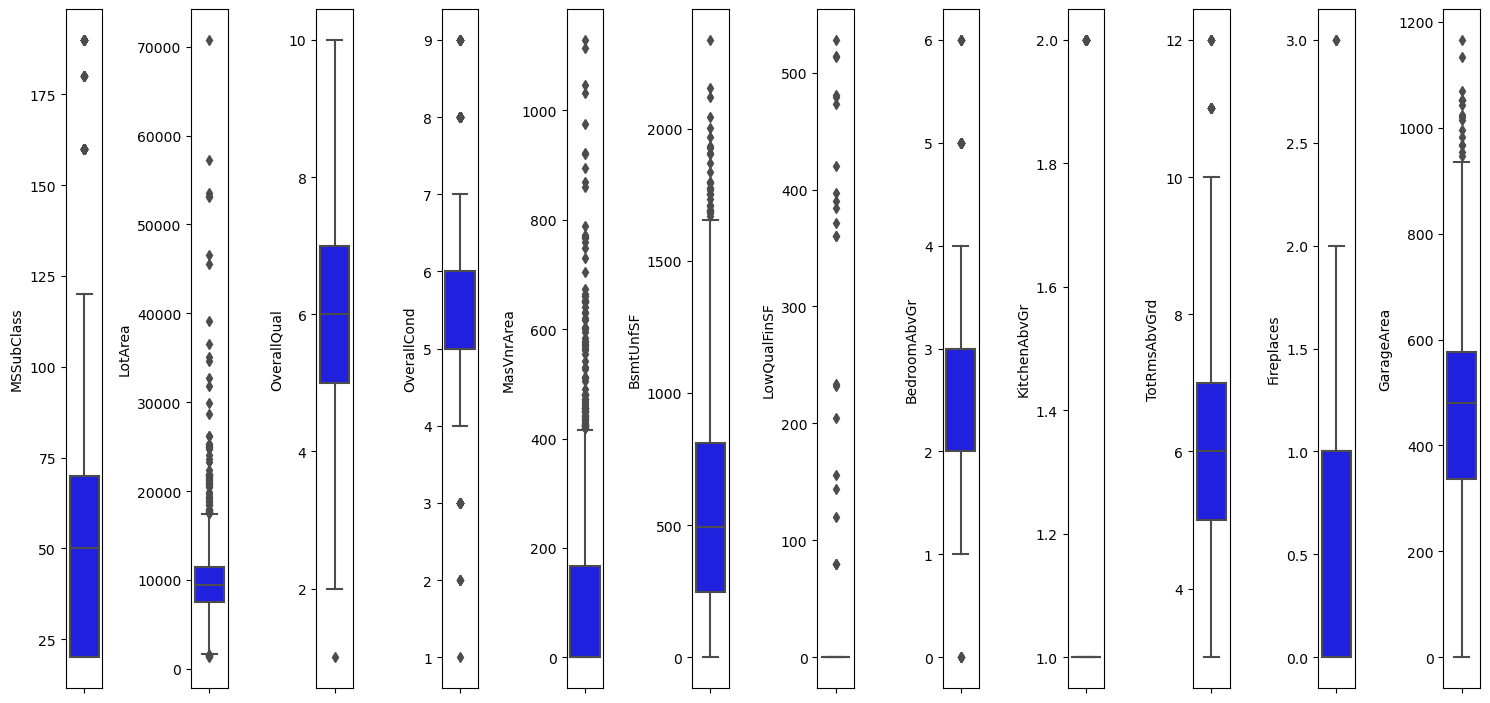

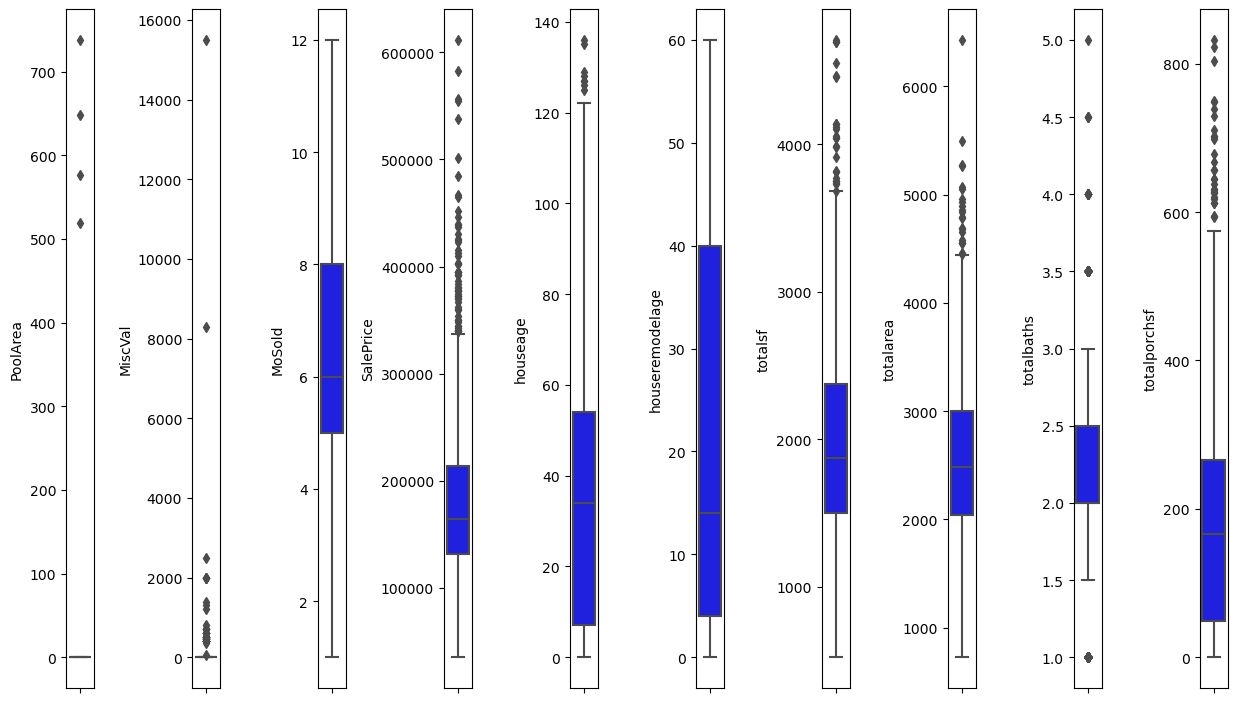

In [131]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
rows = len(numerical_columns)//12 + 1
for j in range(rows):
    plt.figure(figsize=(15,70))
    i = 0
    while i < 12 and i + j*12 < len(numerical_columns):
        plt.subplot(10,12,i+1)
        sns.boxplot(y = train[numerical_columns[i + j*12]],color='blue',orient='v')
        plt.tight_layout()
        i += 1

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

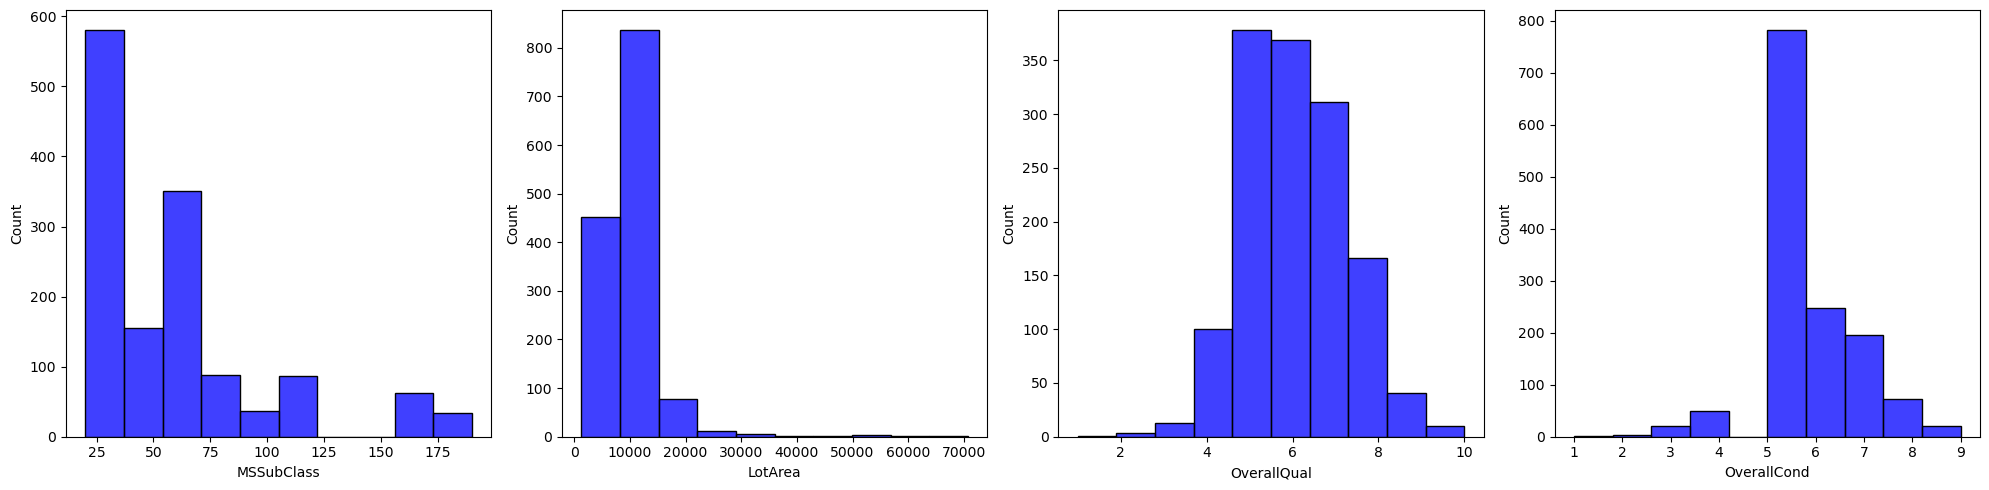

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

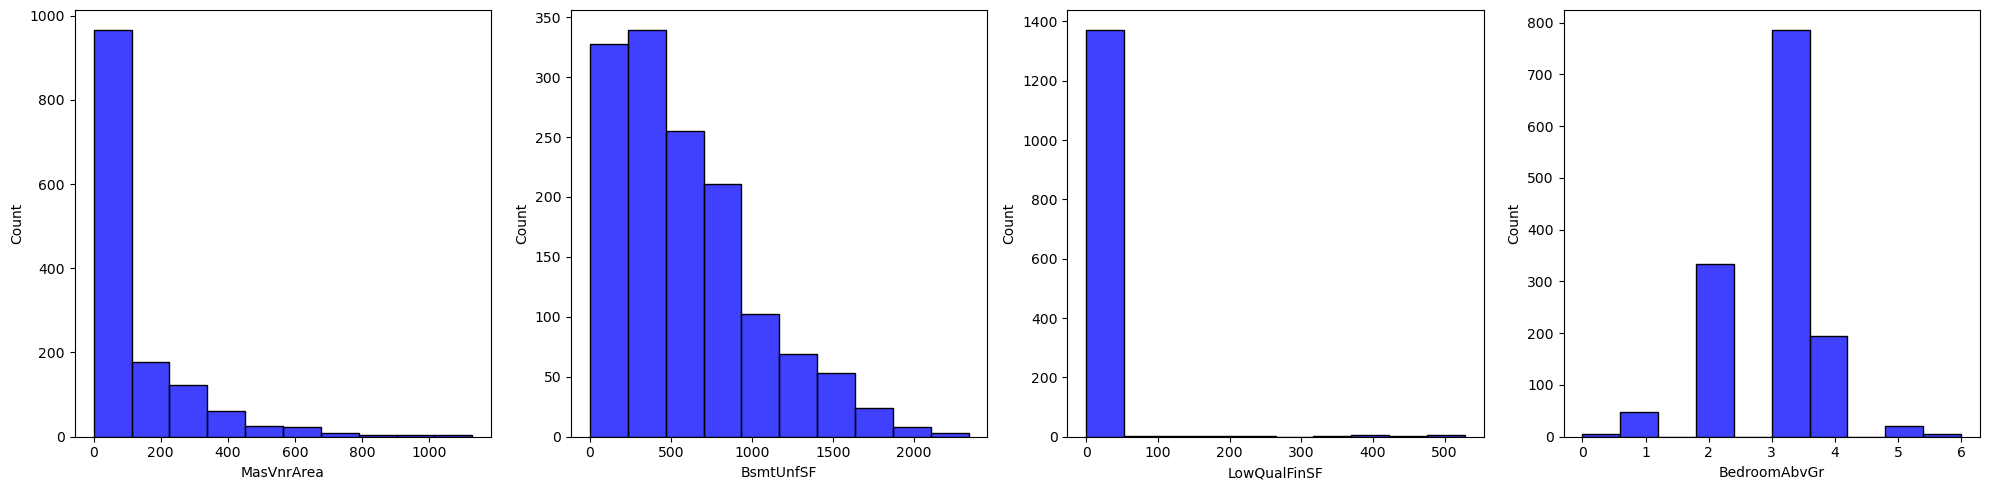

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

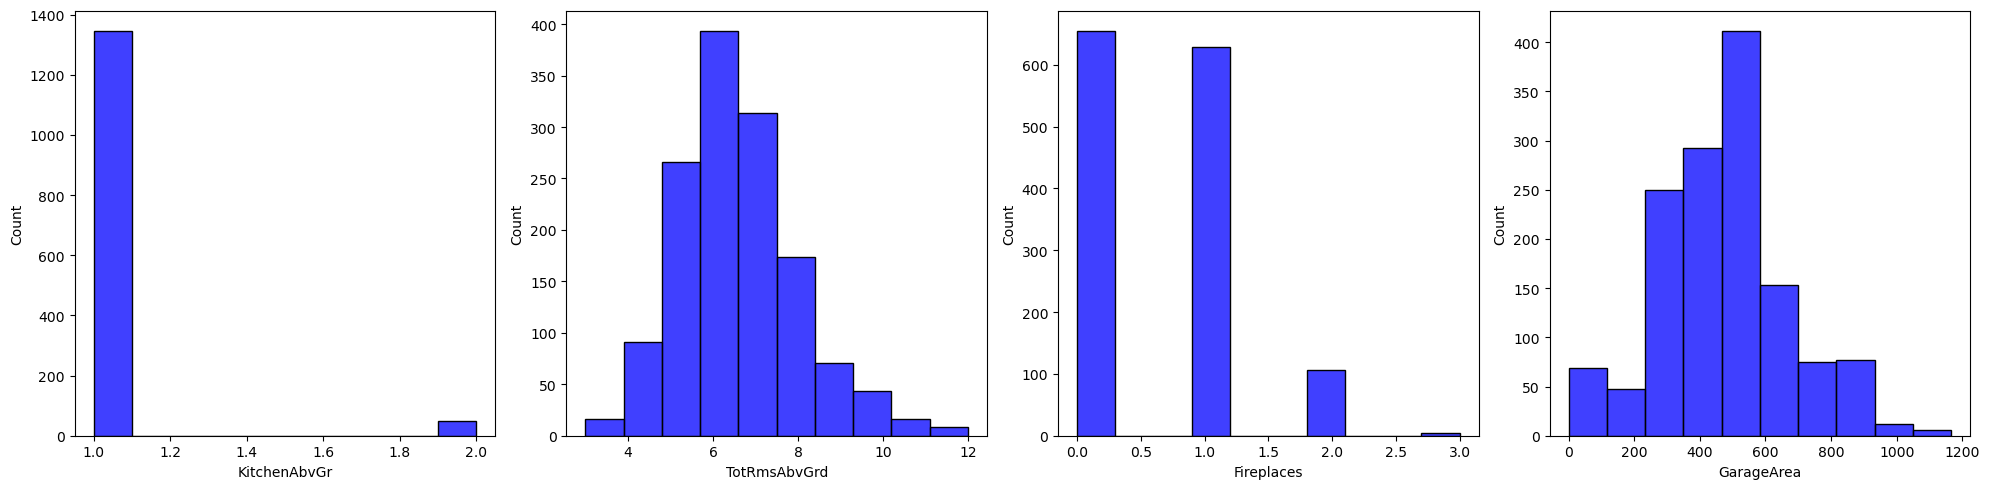

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

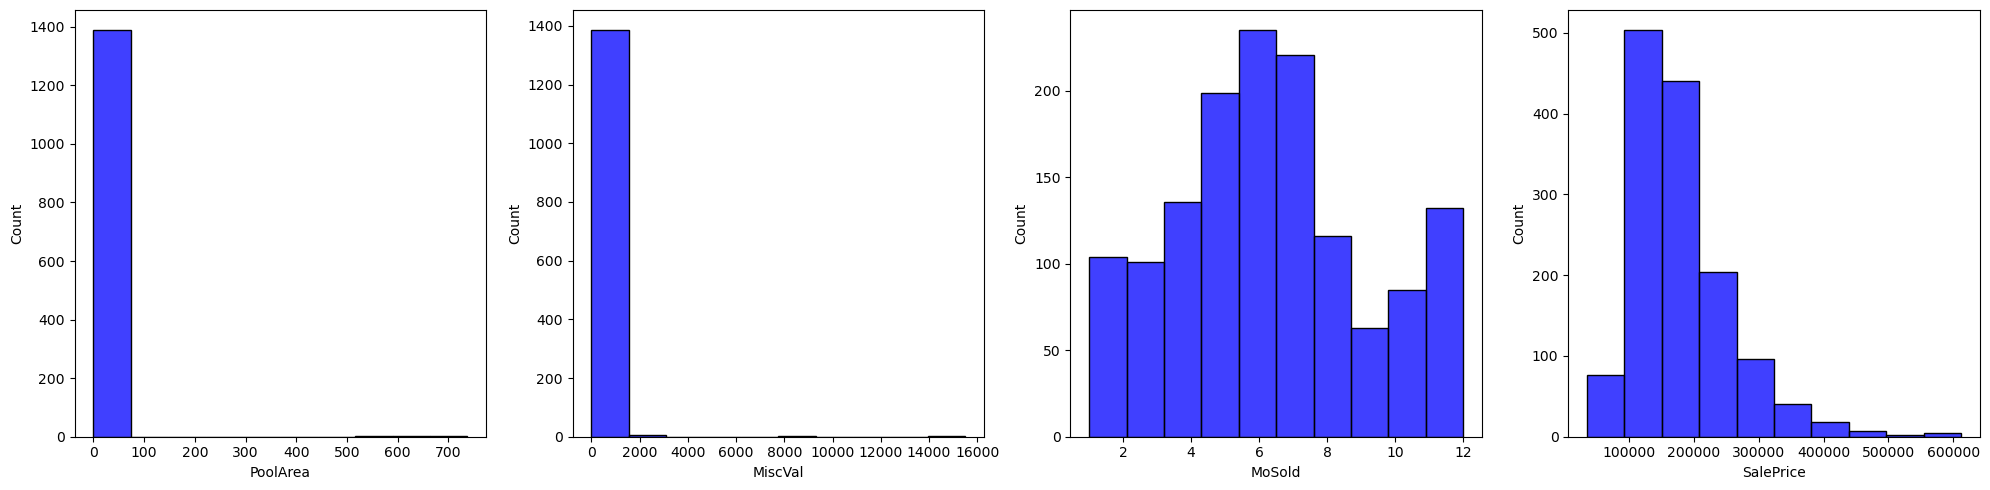

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

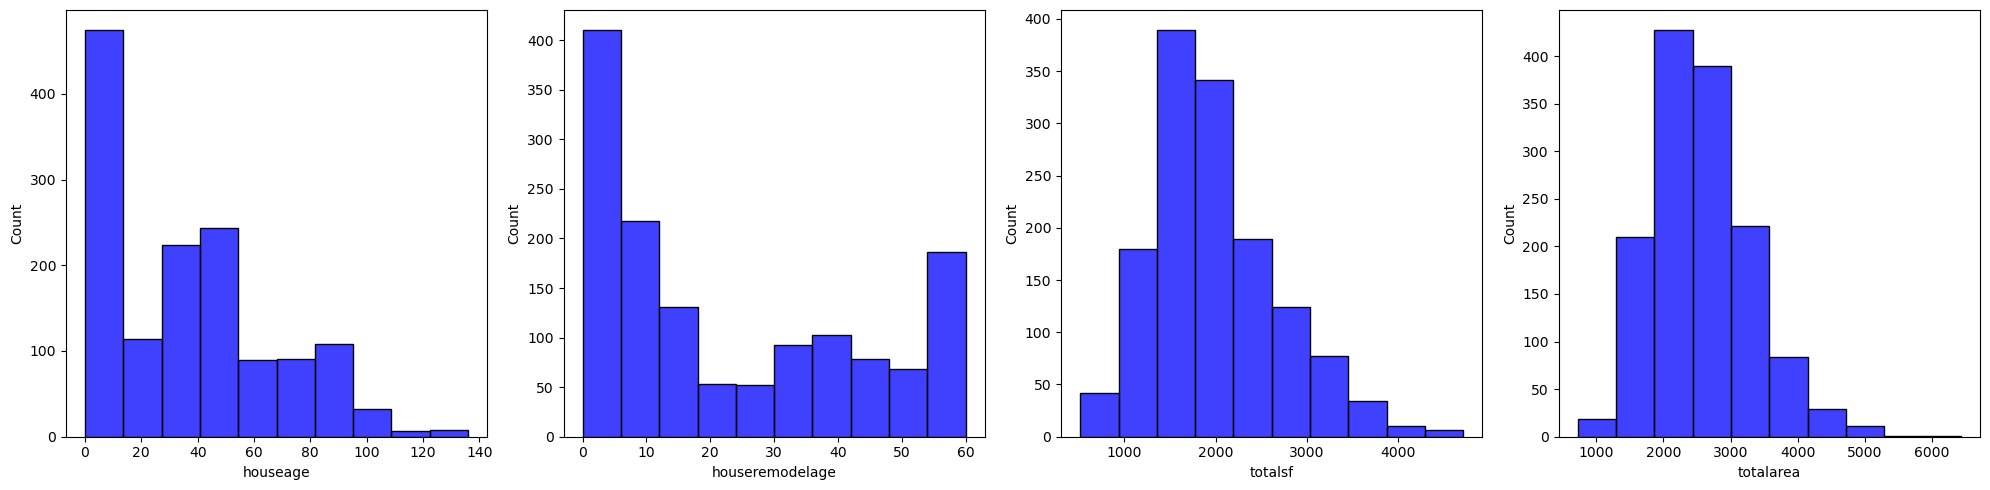

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


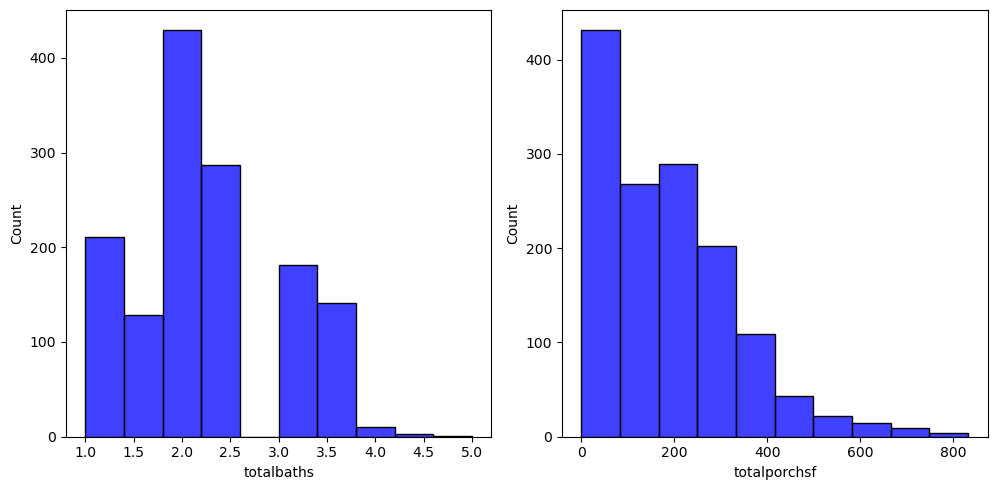

In [132]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
rows = len(numerical_columns) // 4 + 1

for j in range(rows):
    plt.figure(figsize=(20, 5))
    i = 0
    while i < 4 and i + j * 4 < len(numerical_columns):
        plt.subplot(1, 4, i + 1)
        sns.histplot(train[numerical_columns[i + j * 4]], bins=10, kde=False, color='blue')
        plt.tight_layout()
        i += 1
    plt.show()

In [122]:
from scipy.stats import normaltest
def check_normality(train, numerical_columns):
    normal_columns = []
    non_normal_columns = []
    
    for col in numerical_columns:
        # Проверка на нормальность с помощью теста Шапиро-Уилка
        _, p_value = normaltest(train[col])
        
        # Если p-value > 0.05, то распределение считается нормальным
        if p_value > 0.05:
            normal_columns.append(col)
        else:
            non_normal_columns.append(col)
    
    return normal_columns, non_normal_columns

normal_cols, non_normal_cols = check_normality(train, numerical_columns)

print("Столбцы с нормальным распределением:", normal_cols)
print("Столбцы с ненормальным распределением:", non_normal_cols)

Столбцы с нормальным распределением: []
Столбцы с ненормальным распределением: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'houseage', 'houseremodelage', 'totalsf', 'totalarea', 'totalbaths', 'totalporchsf']


Удалим значения, которые коррелируют друг с другом больше, чем на 95%

In [359]:
train['SalePrice'].describe()

count    1431.000000
mean       12.016789
std         0.389403
min        10.471978
25%        11.774528
50%        11.995358
75%        12.264346
max        13.323929
Name: SalePrice, dtype: float64

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


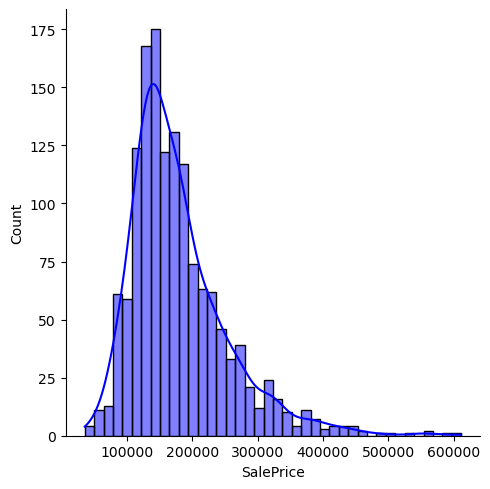

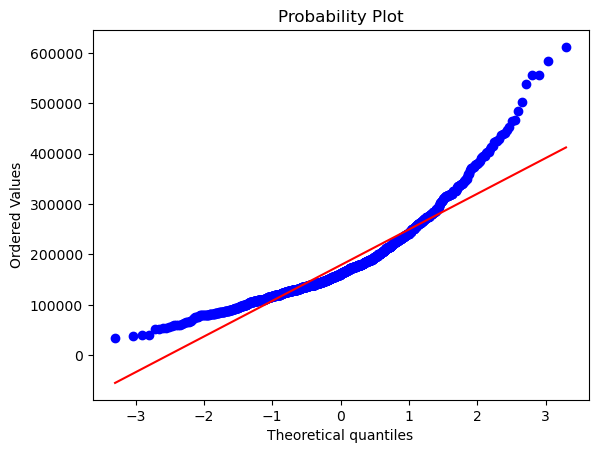

In [353]:
#Видим, что распределение скошено. Модель линейной регрессии требует, чтобы зависимая переменная 
#следовала нормальному распределению, поэтому сделаем логарифмическое преобразование
sns.displot(train,x=train['SalePrice'],kde=True, color="blue", linewidth=1)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Обучение моделей

Будут использованы следующие модели:
- Линейная регрессия;
- Случайные леса (RandomForestClassifier);

In [354]:
train['SalePrice'] = np.log1p(train['SalePrice'])

C:\Users\eatropynina\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


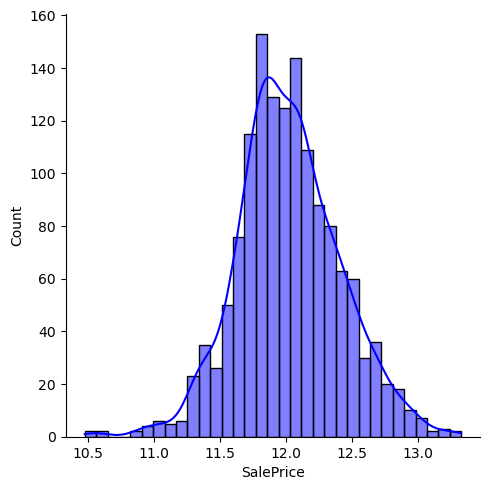

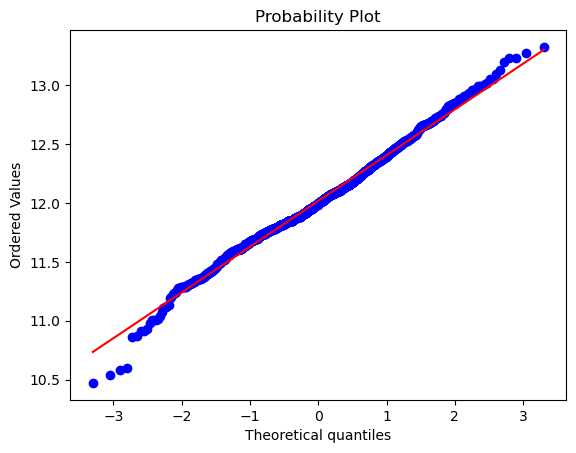

In [355]:
#после преобразования - распределение стало ближе к нормальному
sns.displot(train,x=train['SalePrice'],kde=True, color="blue", linewidth=1)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [366]:
y = train.SalePrice
X = train.drop(['SalePrice'], axis=1)

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [369]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [370]:
lr = model.fit(X_train, y_train)
print("R^2 is:", lr.score(X_test, y_test))

R^2 is: 0.8830997113887407


In [380]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)

In [381]:
print("MSE is:", round(mean_squared_error(y_test, prediction),2))

MSE is: 0.02


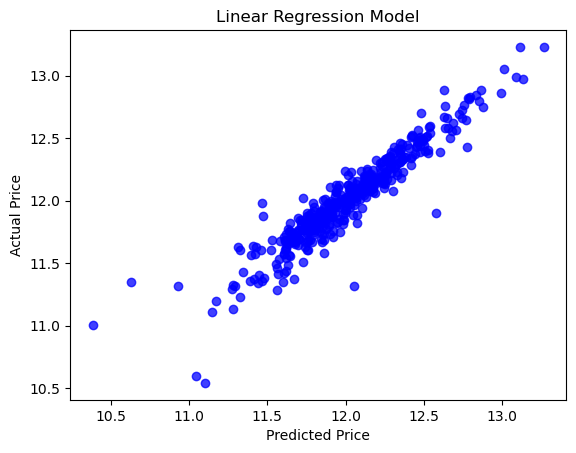

In [382]:
actual_values = y_test
plt.scatter(prediction, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()